In [2]:
import numpy as np
original_data = np.random.exponential(size=1000)

In [26]:
# for Box-Cox Transformation
from scipy import stats
# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

In [5]:
# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt
# set seed for reproducibilitybb
np.random.seed(0)

In [19]:
scaled_data = minmax_scaling(original_data, columns=[0])

Text(0.5, 1.0, 'Scaled Data')

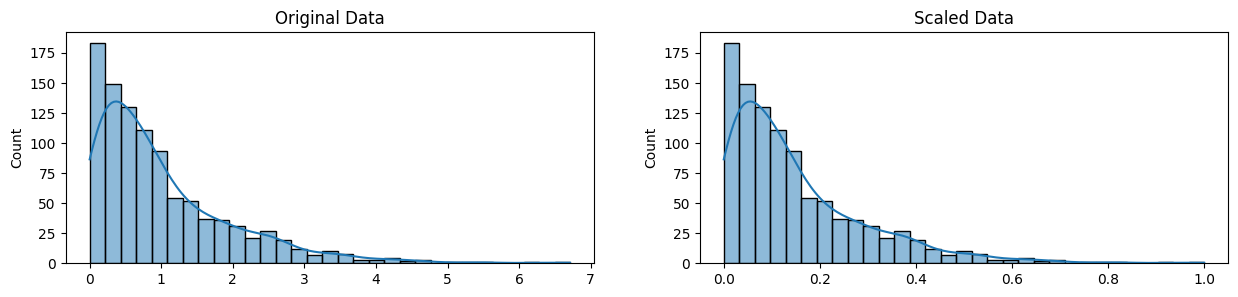

In [32]:
fig , ax = plt.subplots(1,2,figsize=(15,3))
sns.histplot(original_data,ax=ax[0], kde=True,legend = False)
sns.histplot(scaled_data,ax = ax[1],kde=True,legend=False)
ax[0].set_title("Original Data")
ax[1].set_title("Scaled Data")

Normalizing data

In [27]:
normalized_data = stats.boxcox(original_data)

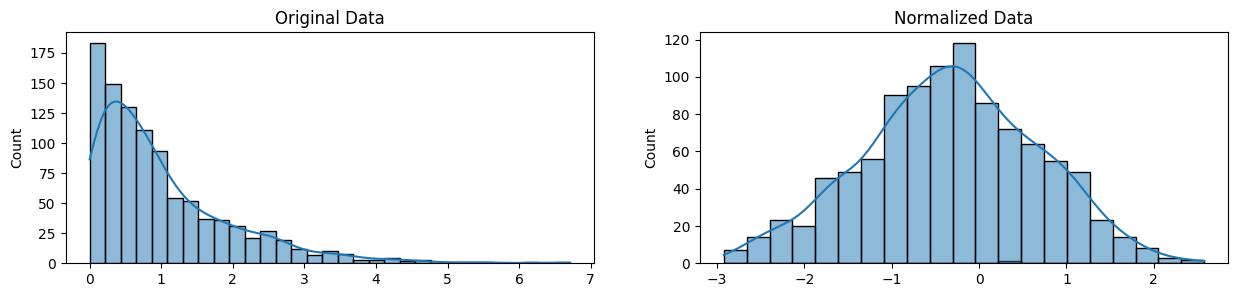

In [33]:
fig , ax = plt.subplots(1,2,figsize=(15,3))

sns.histplot(original_data,ax=ax[0], kde=True,legend = False)
sns.histplot(normalized_data,ax = ax[1],kde=True, legend=False)
ax[0].set_title("Original Data")
ax[1].set_title("Normalized Data")
plt.show()

## Parsing Dates

You can download the dataset from kaggle
"https://www.kaggle.com/learn/data-cleaning"

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime

landslides = pd.read_csv("catalog.csv")

np.random.seed(0)

In [36]:
landslides.head()

,id,date,time,continent_code,country_name,country_code,state/province,population,city/town,distance,...,geolocation,hazard_type,landslide_type,landslide_size,trigger,storm_name,injuries,fatalities,source_name,source_link
0,34,3/2/07,Night,NaN,United States,US,Virginia,16000,Cherry Hill,3.40765,...,"(38.600900000000003, -77.268199999999993)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,NBC 4 news,http://www.nbc4.com/news/11186871/detail.html
1,42,3/22/07,NaN,NaN,United States,US,Ohio,17288,New Philadelphia,3.33522,...,"(40.517499999999998, -81.430499999999995)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,Canton Rep.com,http://www.cantonrep.com/index.php?ID=345054&C...
2,56,4/6/07,NaN,NaN,United States,US,Pennsylvania,15930,Wilkinsburg,2.91977,...,"(40.4377, -79.915999999999997)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,The Pittsburgh Channel.com,https://web.archive.org/web/20080423132842/htt...
3,59,4/14/07,NaN,NaN,Canada,CA,Quebec,42786,Châteauguay,2.98682,...,"(45.322600000000001, -73.777100000000004)",Landslide,Riverbank collapse,Small,Rain,NaN,NaN,NaN,Le Soleil,http://www.hebdos.net/lsc/edition162007/articl...
4,61,4/15/07,NaN,NaN,United States,US,Kentucky,6903,Pikeville,5.66542,...,"(37.432499999999997, -82.493099999999998)",Landslide,Landslide,Small,Downpour,NaN,NaN,0.0,Matthew Crawford (KGS),NaN


In [45]:
print(landslides["date"].head())

0     3/2/07
1    3/22/07
2     4/6/07
3    4/14/07
4    4/15/07
Name: date, dtype: object


In [46]:
landslides["date"].dtype

dtype('O')

In [47]:
landslides["date_parsed"] = pd.to_datetime(landslides["date"],format="%m/%d/%y")
landslides["date_parsed"]

,date_parsed
0,2007-03-02
1,2007-03-22
2,2007-04-06
3,2007-04-14
4,2007-04-15
...,...
1688,2015-12-07
1689,2016-02-22
1690,2016-02-23
1691,2016-02-26


In [53]:
day_of_month_landslides = landslides["date_parsed"].dt.day
day_of_month_landslides.head()

,date_parsed
0,2.0
1,22.0
2,6.0
3,14.0
4,15.0


/tmp/ipython-input-464728007.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(day_of_month_landslides,bins=31,kde=False)


<Axes: xlabel='date_parsed'>

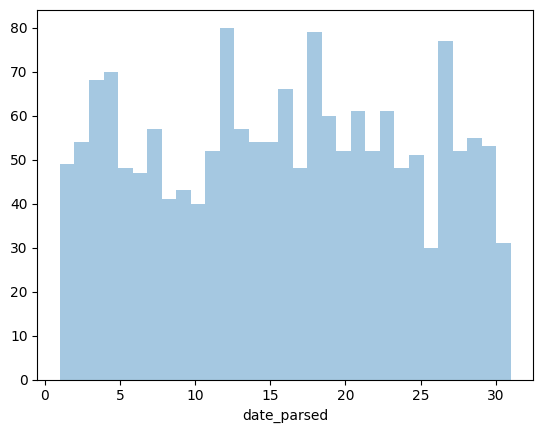

In [67]:
sns.distplot(day_of_month_landslides,bins=31,kde=False)


In [59]:
na_count = landslides['date'].isnull().sum()
print(f"Number of NA values in 'date' column: {na_count}")

Number of NA values in 'date' column: 3


## Student Marks

- Dataset source:https://www.kaggle.com/datasets/spscientist/students-performance-in-exams

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

student_df = pd.read_csv("StudentsPerformance.csv")


In [2]:
student_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
student_df.columns.unique()

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [5]:
for col in student_df.columns:
    print(f"Number of unique values in {col}: {student_df[col].nunique()}")

Number of unique values in gender: 2
Number of unique values in race/ethnicity: 5
Number of unique values in parental level of education: 6
Number of unique values in lunch: 2
Number of unique values in test preparation course: 2
Number of unique values in math score: 81
Number of unique values in reading score: 72
Number of unique values in writing score: 77


In [10]:
for col in student_df.columns:
  if "score" not in col:
     print(f"Unique values in {col}: {student_df[col].unique()}")

Unique values in gender: ['female' 'male']
Unique values in race/ethnicity: ['group B' 'group C' 'group A' 'group D' 'group E']
Unique values in parental level of education: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Unique values in lunch: ['standard' 'free/reduced']
Unique values in test preparation course: ['none' 'completed']


In [11]:
student_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [14]:
student_df[student_df['race/ethnicity']=="group B"]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
2,female,group B,master's degree,standard,none,90,95,93
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
...,...,...,...,...,...,...,...,...
969,female,group B,bachelor's degree,standard,none,75,84,80
976,male,group B,some college,free/reduced,completed,60,62,60
980,female,group B,high school,free/reduced,none,8,24,23
982,male,group B,some high school,standard,completed,79,85,86


In [18]:
student_df.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [21]:
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


/tmp/ipython-input-3597191284.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(student_df['math score'])


<Axes: xlabel='math score', ylabel='Density'>

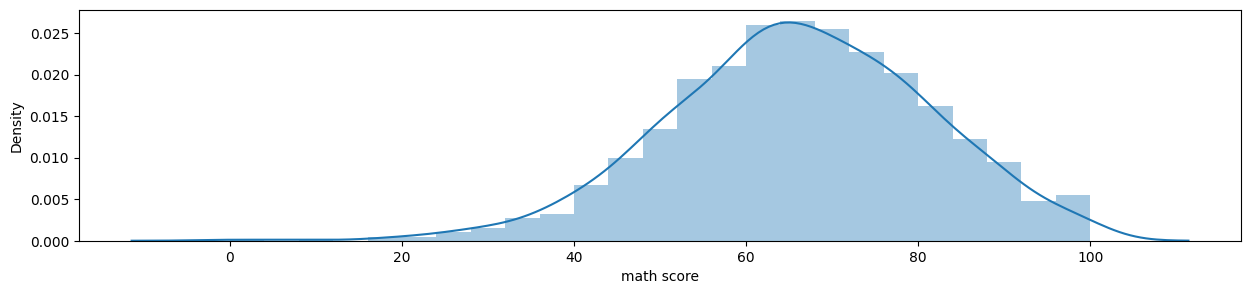

In [24]:
plt.figure(figsize=(15,3))
sns.distplot(student_df['math score'])

/tmp/ipython-input-526200441.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(student_df['reading score'])


<Axes: xlabel='reading score', ylabel='Density'>

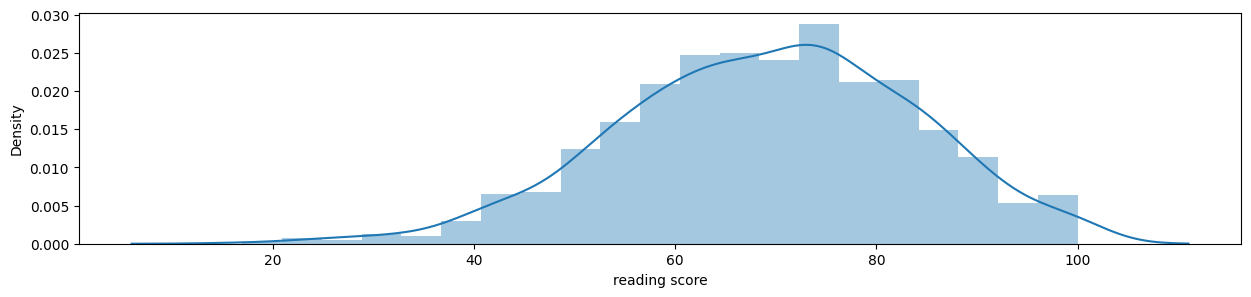

In [25]:
plt.figure(figsize=(15,3))
sns.distplot(student_df['reading score'])

/tmp/ipython-input-4181810614.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(student_df['writing score'])


<Axes: xlabel='writing score', ylabel='Density'>

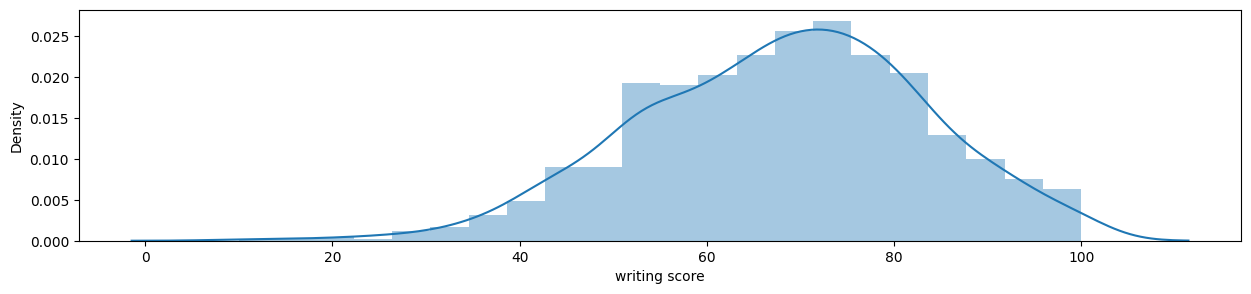

In [26]:
plt.figure(figsize=(15,3))
sns.distplot(student_df['writing score'])

In [52]:
group_math_score = student_df.groupby("race/ethnicity")['math score'].mean().reset_index()
group_math_score

,race/ethnicity,math score
0,group A,61.629213
1,group B,63.452632
2,group C,64.463950
3,group D,67.362595
4,group E,73.821429


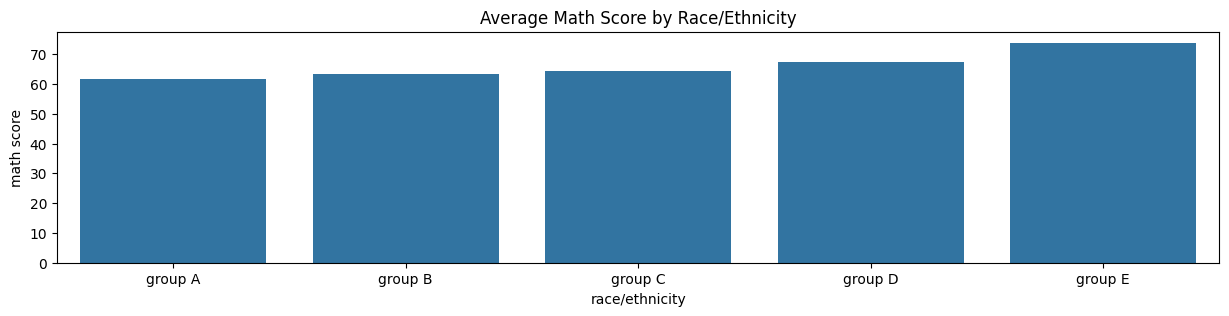

In [60]:
# using seaborn
plt.figure(figsize=(15,3))
sns.barplot(x="race/ethnicity",y="math score",data=group_math_score)
plt.xticks(rotation=0)
plt.title("Average Math Score by Race/Ethnicity")
plt.show()



/tmp/ipython-input-1823451010.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='race/ethnicity', y='math score', data=group_math_score, palette='viridis')


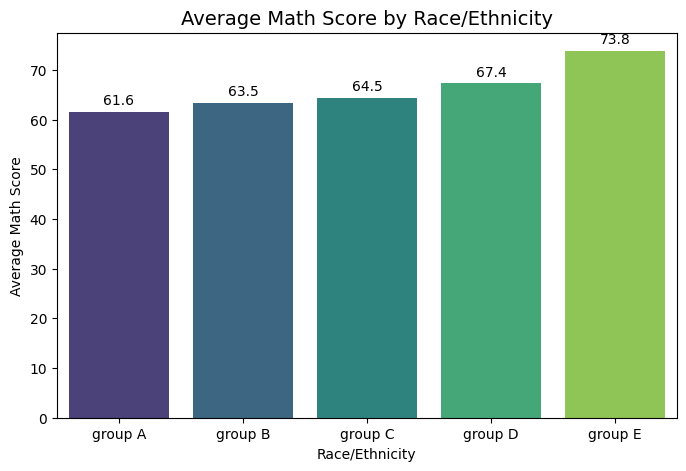

In [66]:
plt.figure(figsize=(8,5))
ax = sns.barplot(x='race/ethnicity', y='math score', data=group_math_score, palette='viridis')

# add value labels on each bar
for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.1f'),  # show one decimal
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha = 'center', va = 'bottom',
        fontsize = 10, color='black', xytext=(0, 3),
        textcoords='offset points'
    )

plt.title('Average Math Score by Race/Ethnicity', fontsize=14)
plt.xlabel('Race/Ethnicity')
plt.ylabel('Average Math Score')
plt.show()

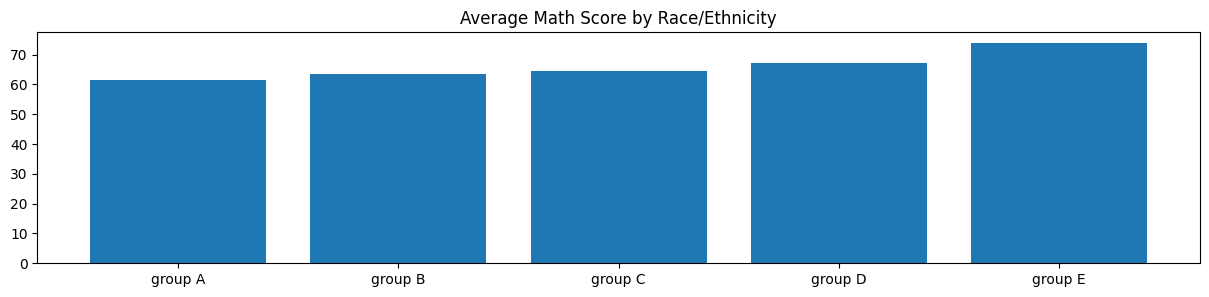

In [62]:
#using plt
plt.figure(figsize=(15,3))
plt.bar(group_math_score["race/ethnicity"],group_math_score["math score"])
plt.xticks(rotation=0)
plt.title("Average Math Score by Race/Ethnicity")
plt.show()


In [63]:
gender_group_math = student_df.groupby("gender")['math score'].mean().reset_index()
gender_group_math

,gender,math score
0,female,63.633205
1,male,68.728216


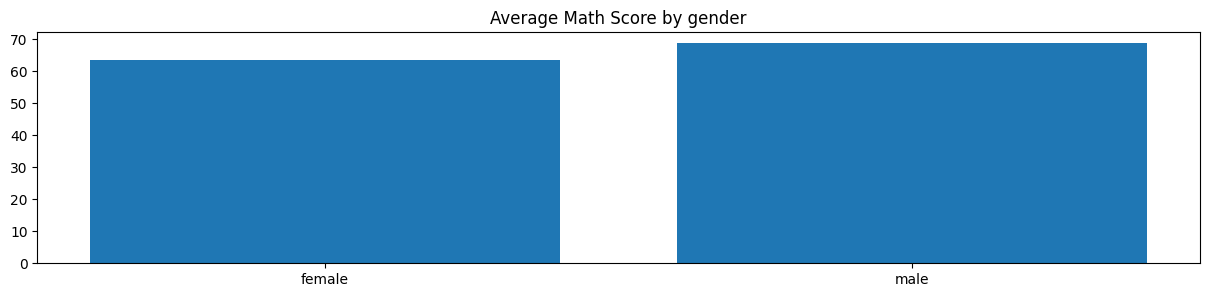

In [69]:
plt.figure(figsize=(15,3))
ax = plt.bar(gender_group_math["gender"],gender_group_math["math score"])
plt.xticks(rotation=0)
plt.title("Average Math Score by gender")
plt.show()